In [68]:
from __future__ import print_function

In [69]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [70]:
import torch
import torch.nn as nn
import torch.backends.cudnn as cudnn
import matplotlib.pyplot as plt
import torchvision
import numpy as np
import pandas as pd
import tensorflow as tf
from os.path import join, exists, expanduser
from keras.layers import Flatten, Dense, Dropout, Reshape, Permute, Activation, \
    Input, merge, Lambda

In [71]:
use_cuda = torch.cuda.is_available()

In [72]:
from dataset import dataset
from AlexNet import AlexNet
from train_test import start_train_test

In [73]:
data_dir = './'
INPUT_SIZE = 224
NUM_CLASSES = 16
SEED = 1987
labels = pd.read_csv(join(data_dir, 'labels.csv'))
sample_submission = pd.read_csv(join(data_dir, 'sample_submission.csv'))

In [74]:
selected_breed_list = list(labels.groupby('breed').count().sort_values(by='id', ascending=False).head(NUM_CLASSES).index)
labels = labels[labels['breed'].isin(selected_breed_list)]
labels['target'] = 1
group = labels.groupby(by='breed', as_index=False).agg({'id': pd.Series.nunique})

group = group.sort_values('id',ascending=False)

print(group)

labels['rank'] = group['breed']

labels_pivot = labels.pivot('id', 'breed', 'target').reset_index().fillna(0)
np.random.seed(seed=SEED)
rnd = np.random.random(len(labels))
train_idx = rnd < 0.8
valid_idx = rnd >= 0.8
y_train = labels_pivot[selected_breed_list].values
ytr = y_train[train_idx]
yv = y_train[valid_idx]

                   breed   id
13    scottish_deerhound  126
10           maltese_dog  117
0           afghan_hound  116
6            entlebucher  115
4   bernese_mountain_dog  114
14              shih-tzu  112
7         great_pyrenees  111
11            pomeranian  111
2                basenji  110
12               samoyed  109
1               airedale  107
15       tibetan_terrier  107
5                  cairn  106
9               leonberg  106
3                 beagle  105
8       japanese_spaniel  105


In [89]:
trainloader, testloader, outputs, inputs = dataset('dog-breed')
print ('Output classes: {}\nInput channels: {}'.format(outputs, inputs))

| Preparing dog-breed dataset...
Output classes: 16
Input channels: 3


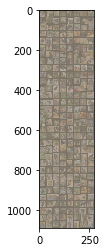

In [76]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputdata, classes = next(iter(trainloader))
# Make a grid from batch
out = torchvision.utils.make_grid(inputdata)

imshow(out)


In [83]:
net = AlexNet(num_classes = outputs, inputs=inputs)
file_name = 'alexnet-'

In [84]:
if use_cuda:
    net.cuda()
    net = torch.nn.DataParallel(net, device_ids=range(torch.cuda.device_count()))
    cudnn.benchmark = True

In [85]:
criterion = nn.CrossEntropyLoss()

In [86]:
train_loss, test_loss = start_train_test(net, trainloader, testloader, criterion)


=> Training Epoch #1, LR=0.0010
| Epoch [  1/ 10] 		Loss: 0.0000 Acc@1: 97.000%

| Validation Epoch #1			Loss: 0.0000 Acc@1: 100.00%
* Test results : Acc@1 = 100.00%
| Elapsed time : 0:01:44

=> Training Epoch #2, LR=0.0010
| Epoch [  2/ 10] 		Loss: 0.0000 Acc@1: 100.000%

| Validation Epoch #2			Loss: 0.0000 Acc@1: 100.00%
* Test results : Acc@1 = 100.00%
| Elapsed time : 0:03:41

=> Training Epoch #3, LR=0.0010
| Epoch [  3/ 10] 		Loss: 0.0005 Acc@1: 100.000%

| Validation Epoch #3			Loss: 0.0001 Acc@1: 100.00%
* Test results : Acc@1 = 100.00%
| Elapsed time : 0:06:23

=> Training Epoch #4, LR=0.0010
| Epoch [  4/ 10] 		Loss: 0.0000 Acc@1: 100.000%

| Validation Epoch #4			Loss: 0.0000 Acc@1: 100.00%
* Test results : Acc@1 = 100.00%
| Elapsed time : 0:08:43

=> Training Epoch #5, LR=0.0010
| Epoch [  5/ 10] 		Loss: 0.0000 Acc@1: 100.000%

| Validation Epoch #5			Loss: 0.0000 Acc@1: 100.00%
* Test results : Acc@1 = 100.00%
| Elapsed time : 0:10:43

=> Training Epoch #6, LR=0.0010
| E

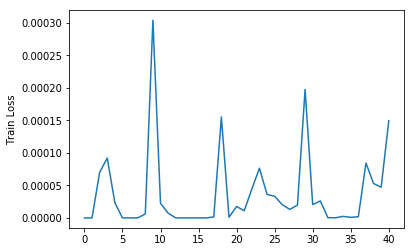

In [87]:
plt.plot(train_loss)
plt.ylabel('Train Loss')
plt.show()

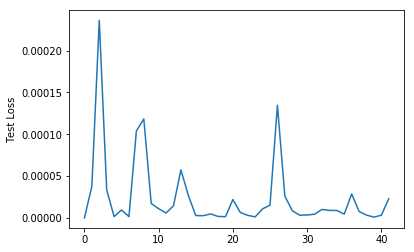

In [88]:
plt.plot(test_loss)
plt.ylabel('Test Loss')
plt.show()